<a href="https://colab.research.google.com/github/ayobamiakomolafe/Data-Scraping-and-Analysis-of-Whatsapp-Chat/blob/main/whatsapp_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo pip install emoji

In [ ]:
# Importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

import regex 
import re, nltk
import emoji
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Function to detect the date at the start of the line to make each row unique.
def DateTime(s):
    regex_format = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -' 
    result = re.match(regex_format, s)
    if result:
        return True
    return False

# Function to extract the group chat participant names
def Participants(a):
  a=a.split(":")
  if len(a)==2:
    return True
  else:
    return False

# Function to organize the data properly to be represented as a pandas dataframe
def GetDataPoints(line):   
    splitLine = line.split(' - ') 
    dateTime = splitLine[0]
    date, time = dateTime.split(', ') 
    message = ' '.join(splitLine[1:])
    if Participants(message): 
        splitMessage = message.split(': ') 
        participants = splitMessage[0] 
        message = ' '.join(splitMessage[1:])
    else:
        participants = None
    return date, time, participants, message

 # Function to extract the emojis and add them to a new column
def split_count(text):

    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI for char in word):
            emoji_list.append(word)

    return emoji_list



In [ ]:
parsedData=[]
data = [] 
text_data = '/content/drive/MyDrive/WhatsApp Chat with AI+Club UI.txt' # replace with the file name of your text data
with open(text_data, encoding="utf-8") as fp: #fp stands for file pointer and helps in reading in the data
    fp.readline()
    messageBuffer = [] 
    date, time, participants = None, None, None
    while True:
        line = fp.readline() 
        if not line: 
            break
        line = line.strip() 
        if DateTime(line): 
            if len(messageBuffer)> 0: 
                parsedData.append([date, time, participants, ' '.join(messageBuffer)]) 
            messageBuffer.clear() 
            date, time, participants, message = GetDataPoints(line) 
            messageBuffer.append(message) 
        else:
            messageBuffer.append(line)


In [ ]:
clean_data = pd.DataFrame(parsedData, columns=['Date', 'Time', 'Participants', 'Message']) # Reading in the data in a dataframe form
clean_data["Date"] = pd.to_datetime(clean_data["Date"])# making sure the date column is in a datetime format.  
clean_data["emoji"] = clean_data["Message"].apply(split_count) # Applying the emoji function to extract the emojis from the messages.
 
clean_data.head(10) # Having a look at the first 10 entries

,Date,Time,Participants,Message,emoji
0,2020-03-30,1:37 pm,None,"You created group ""AI+Club UI""",[]
1,2020-03-30,1:39 pm,Israel King,Awon Oga oh 🙇‍♂️🙇‍♂️🙇‍♂️🙇‍♂️,[]
2,2020-03-30,1:39 pm,None,You changed this group's icon,[]
3,2020-03-30,1:40 pm,None,You added Elisha DSN,[]
4,2020-03-30,1:46 pm,Ernest Owojori,You deleted this message,[]
5,2020-03-30,1:47 pm,Ernest Owojori,Hi Sir/ma,[]
6,2020-03-30,1:49 pm,Ernest Owojori,This is the potential AI + Club for University...,[]
7,2020-03-30,1:50 pm,Ernest Owojori,I will roll out a draft to capture student of ...,[]
8,2020-03-30,2:20 pm,Israel King,Kk,[]
9,2020-03-30,2:25 pm,Ernest Owojori,You deleted this message,[]


In [ ]:
clean_data.shape

(15039, 5)

In [ ]:
len(clean_data['Participants'].unique())

265

In [ ]:
clean_data['Date'][0] - clean_data['Date'][13934]

Timedelta('-269 days +00:00:00')

In [ ]:
clean_data['Date'][13934]

Timestamp('2020-12-24 00:00:00')

In [ ]:
# To understand the number od the image data
img = clean_data[clean_data['Message'] == "<Media omitted>" ]
img.shape

(898, 5)

In [ ]:
totalNumberofMessage = clean_data.Message.count()
username   = clean_data["Participants"].unique() #unique is a functions that able find the unique elements of an array

print('The total of the number of message:',totalNumberofMessage)
print('User name that involve in the chat:',username)

In [ ]:
clean_data1 = clean_data.copy()

In [ ]:
clean_data1

Some EDA 
1.  Which users have the most Chat/messages in the group?
2.   Which emojis use the most by which users?
3. Most active hours?
4. Which month have the highest messages and also the busiest month?
5. Determine which word or text did the user use the most?



In [ ]:
# Start Date of Analysis: Date of Group Creation
Date_lists=clean_data['Date'].values
Date_lists[0]

numpy.datetime64('2020-03-30T00:00:00.000000000')

In [ ]:
#Date of analysis being made
Date_lists=clean_data['Date'].values
Date_lists[-1]

numpy.datetime64('2021-02-15T00:00:00.000000000')

In [ ]:
#Participation of Members
clean_data1['Number_of_messages'] = [1]* clean_data1.shape[0]
clean_data1.drop(['Date', 'Time'], axis =1)
 
#We are groupby the user and messages together then we will use count() to count the messages for each of user
clean_data1 = clean_data1.groupby('Participants')['Number_of_messages'].count().sort_values(ascending = False).reset_index() 
clean_data1

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#  Using seaborn for Styles 
sns.set_style("whitegrid")

# Resize the  figure size
plt.figure(figsize=(12, 9))

# Here we are ploting the line chart using plt.plot 
plt.plot(clean_data1.Participants, clean_data1.Number_of_messages, 'o--c')  

# In here we are writing the Labels and Title for the plot chart
plt.xlabel('Participants ')
plt.ylabel('Total number of messages')

plt.title("The highest number of messages send by the Participants")
plt.legend(['Messages send']);

In [ ]:
#Formating
sns.set_style("darkgrid")
import matplotlib

#The background of the chart
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (12, 9)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
fig, ax = plt.subplots()

#Creating a bar chart
sns.barplot(clean_data1.Participants,clean_data1.Number_of_messages,hue='Participants',data=clean_data1,dodge=False,palette="CMRmap")

#The title of our charts
plt.title("The highest number of messages")

#Change the width of the bar chart plot
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax, .35)
plt.show()

In [ ]:
#Copy a dataset
clean_data2 = clean_data1.copy()

#Count the number of emoji
emoji_ctr = Counter()
emojis_list = map(lambda x: ''.join(x.split()), emoji.UNICODE_EMOJI.keys()) #UNICODE_EMOJI class have a thee emoji code inside
r = re.compile('|'.join(re.escape(p) for p in emojis_list))
for idx, row in clean_data2.iterrows():
    emojis_found = r.findall(row["Participants"]) #The findall() is a functions for regex that help to find a matches 
    for emoji_found in emojis_found:
        emoji_ctr[emoji_found] += 1

In [ ]:
#This will help to create or rendered the emoji 
emojis_df = pd.DataFrame() #The reason to use pd.dataframe is we want to put the emojis_df into the dataframe tables
emojis_df['emoji'] = [''] * 10
emojis_df['number_of_Emoji'] = [0] * 10

i = 0
for item in emoji_ctr.most_common(10):
    emojis_df.emoji[i] = item[0]
    emojis_df.number_of_Emoji[i] = int(item[1])
  
    i += 1

emojis_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,emoji,number_of_Emoji
0,es,8
1,en,3
2,it,1
3,,0
4,,0
5,,0
6,,0
7,,0
8,,0
9,,0


In [ ]:
emojis_df.value_counts()

emoji  number_of_Emoji
       0                  7
it     1                  1
es     8                  1
en     3                  1
dtype: int64

In [ ]:
#This pei chart give us and ideas the overall view of which emoji use the most
import plotly.express as px
fig = px.pie(emojis_df, values='number_of_Emoji', names='emoji',title='Emoji percentage used in chat group')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

Nummber of Messages sent since creation

In [ ]:
clean_data.shape

(15039, 5)

Activity of members (Number of messages sent by each member)

In [ ]:
df_activity=clean_data.groupby('Participants')['Message'].count()
df_activity=df_activity.to_frame().reset_index().sort_values('Message', ascending=False).reset_index()
df_activity.head()

,index,Participants,Message
0,201,Ernest Owojori,3775
1,209,Israel King,1710
2,261,Warris AI+,1020
3,195,Dampek AI+,652
4,180,Abono,350


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

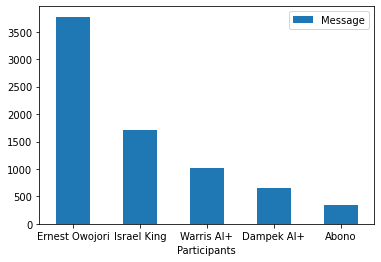

In [ ]:
df_plot=df_activity[['Participants','Message']]
df_plot=df_plot.iloc[0:5,:]
df_plot.plot(kind='bar', x='Participants',y='Message')
plt.xticks(rotation = 0)
plt.savefig("abc.png")
files.download("abc.png")

Most active hours of chat on the whatsapp group

In [ ]:
#Copy a dataframe
clean_data3 = clean_data.copy()

In [ ]:
clean_data3.head()

,Date,Time,Participants,Message,emoji
0,2020-03-30,1:37 pm,None,"You created group ""AI+Club UI""",[]
1,2020-03-30,1:39 pm,Israel King,Awon Oga oh 🙇‍♂️🙇‍♂️🙇‍♂️🙇‍♂️,[]
2,2020-03-30,1:39 pm,None,You changed this group's icon,[]
3,2020-03-30,1:40 pm,None,You added Elisha DSN,[]
4,2020-03-30,1:46 pm,Ernest Owojori,You deleted this message,[]


In [ ]:
# extract the hour of the day from time column
time_list=clean_data3['Time'].values
Hours=list()
for i in time_list:
  x=i.split(':')
  x=x[0]
  y=i.split(' ')
  y=y[1]
  z=x+y
  Hours.append(z)
clean_data3["Hours"]=Hours

In [ ]:
hour_activity=clean_data3.groupby('Hours')['Message'].count()
hour_activity=hour_activity.to_frame().reset_index().sort_values('Message', ascending=False)
hour_activity.head()

,Hours,Message
23,9pm,1182
21,8pm,1138
17,6pm,1095
5,12pm,1090
19,7pm,1075


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

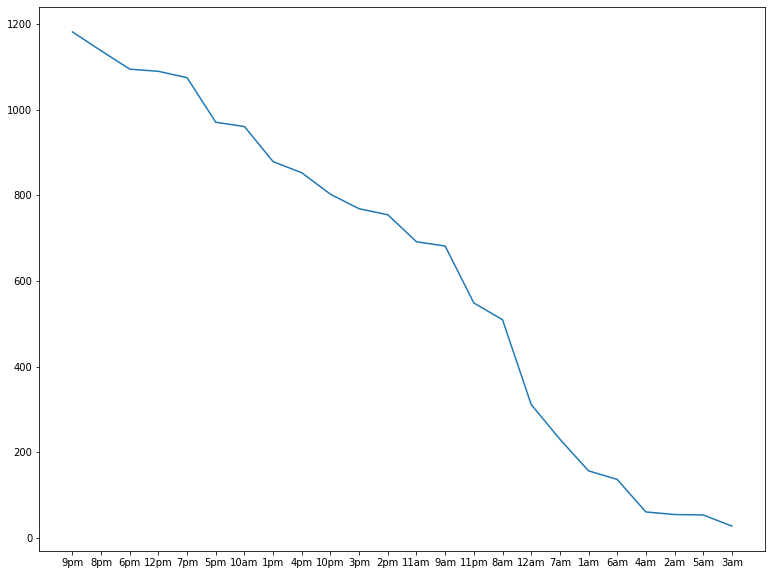

In [ ]:
df_plot=hour_activity[['Hours','Message']]
X=df_plot['Hours'].values
Y=df_plot['Message'].values
plt.figure(figsize=(13,10)) 
plt.plot(X, Y) 
           
plt.savefig("abc.png")
files.download("abc.png")      



Most active Months

In [ ]:
clean_data3['Month']=clean_data3['Date'].dt.month
month_activity=clean_data3.groupby('Month')['Message'].count()
month_activity=month_activity.to_frame().reset_index().sort_values('Message', ascending=False)
month_activity.head()

,Month,Message
9,10,2563
8,9,1879
10,11,1445
7,8,1269
3,4,1213


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

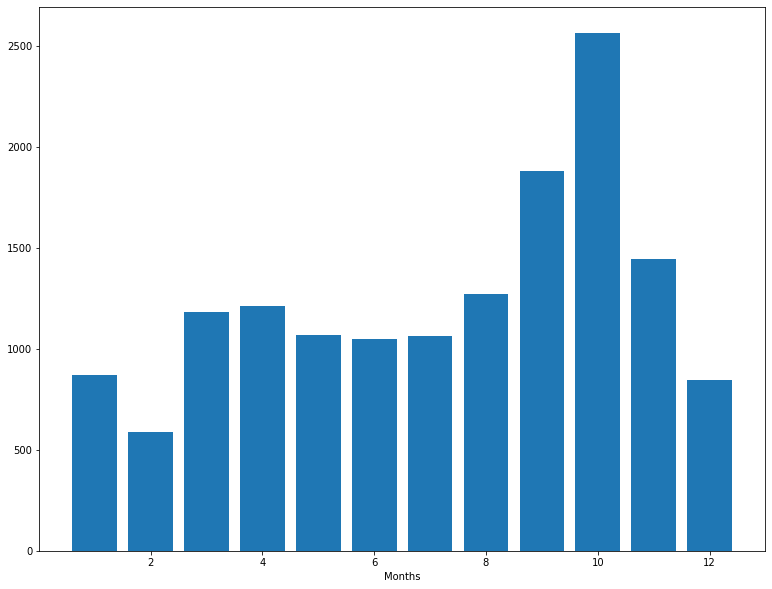

In [ ]:
df_plot=month_activity[['Month','Message']]
X=df_plot['Month'].values
Y=df_plot['Message'].values
plt.figure(figsize=(13,10)) 
plt.bar(X, Y) 
plt.xlabel('Months')
plt.savefig("abc.png")
files.download("abc.png")


Most active Days

In [ ]:
# Number of days passed(Days from Group creation to analysis)
from datetime import date
d0 = date(2020, 3, 30)
d1 = date(2021, 2, 15)
delta = d1 - d0
print(delta.days)

322


In [ ]:
#days with messages recorded
clean_data3['Date'].nunique()

314

In [ ]:
#Number of Days without any activity message
322-314

8

8 days without any chat at all


In [ ]:
# Day of the Month
clean_data3['Day']=clean_data3['Date'].dt.day
day_activity=clean_data3.groupby('Day')['Message'].count()
day_activity=day_activity.to_frame().reset_index().sort_values('Message', ascending=False)
day_activity.head()

,Day,Message
8,10,1159
9,11,920
12,14,716
2,4,714
19,21,690


<Figure size 936x720 with 0 Axes>

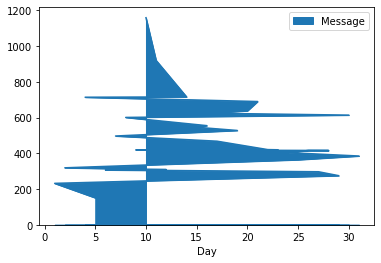

In [ ]:
df_plot=day_activity[['Day','Message']]
X=df_plot['Day'].values
Y=df_plot['Message'].values
plt.figure(figsize=(13,10)) 
df_plot.plot(kind='area',x='Day', y='Message')

In [ ]:
# Day of the week
#Monday=0, Sunday=6
clean_data3['Day_of_week']=clean_data3['Date'].dt.dayofweek
day_of_Week_activity=clean_data3.groupby('Day_of_week')['Message'].count()
day_of_Week_activity=day_of_Week_activity.to_frame().reset_index().sort_values('Message', ascending=False)
day_of_Week_activity

,Day_of_week,Message
1,1,2921
4,4,2631
0,0,2337
5,5,2217
2,2,1871
3,3,1669
6,6,1393


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 936x720 with 0 Axes>

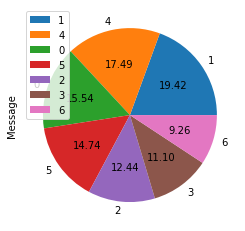

In [ ]:
df_plot=day_of_Week_activity[['Day_of_week','Message']]
X=df_plot['Day_of_week'].values
Y=df_plot['Message'].values
plt.figure(figsize=(13,10)) 
df_plot.plot(kind='pie',x='Day_of_week', y='Message',autopct='%.2f')
plt.savefig("abc.png")
files.download("abc.png")

In [ ]:
# of the 314 days of recorded chats, days with most active chats
#Brain teaser:why were there many discussions on that particular day
most_active_date=clean_data3.groupby('Date')['Message'].count()
most_active_date=most_active_date.to_frame().reset_index().sort_values('Message', ascending=False)
most_active_date.head()

,Date,Message
203,2020-10-20,307
25,2020-03-30,296
39,2020-04-16,276
248,2020-12-11,270
26,2020-03-31,266


Checking occurence of top 3 most active day chats

In [ ]:
df=clean_data3[clean_data3['Date']=='2020-10-20T00:00:00.000000000']
df['Message'].values

#It was the day of DSN Bootcamp 2020 opening ceremony

In [ ]:
df=clean_data3[clean_data3['Date']=='2020-03-30T00:00:00.000000000']
df['Message'].values

#It was the day the group was created

In [ ]:
df=clean_data3[clean_data3['Date']=='2020-04-16T00:00:00.000000000']
df['Message'].values

# A random day( But the group seems to be preparing for lots of hackathons during this period)

MOST USED WORDS

In [ ]:
Messages=clean_data3['Message'].values

In [ ]:
 nltk.download('stopwords')
stop_words=(stopwords.words('english'))
print (stop_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'bo

In [ ]:
WORDS=list()
for word in Messages:
  x=word.split(' ')
  for i in x:
    WORDS.append(i)
  

In [ ]:
word_dict=dict()
for i in WORDS:
  if i in word_dict:
    word_dict[i]=word_dict[i]+1
  if not i in word_dict:
    word_dict[i]=1



In [ ]:
new_list=list()
for a,b in word_dict.items():
  x=(b,a)
  new_list.append(x)
new_list=sorted(new_list)



In [ ]:
cloud_words=word_dict.keys()
cloud_words
  


dict_keys(['You', 'created', 'group', '"AI+Club', 'UI"', 'Awon', 'Oga', 'oh', '🙇\u200d♂️🙇\u200d♂️🙇\u200d♂️🙇\u200d♂️', 'changed', 'this', "group's", 'icon', 'added', 'Elisha', 'DSN', 'deleted', 'message', 'Hi', 'Sir/ma', 'This', 'is', 'the', 'potential', 'AI', '+', 'Club', 'for', 'University', 'of', 'Ibadan', 'I', 'will', 'roll', 'out', 'a', 'draft', 'to', 'capture', 'student', 'our', 'great', 'institution', 'Kk', 'AI+Club', '', 'AI+', 'not', 'strange', 'name', 'students', 'higher', 'institutions', 'in', 'Nigeria', 'that', 'are', 'following', 'recent', 'evolution', 'Artificial', 'Intelligence', 'country', 'solely', 'fronted', 'by', 'Data', 'Science', 'Nigeria.', 'According', 'statistics', 'provided', 'biginning', 'year', '2020,', 'about', '15', 'AI+Clubs', 'exists', 'across', 'universities', 'And', 'recently,', 'there', 'an', 'update', 'and', 'we', 'glad', 'inform', 'birthing', 'UI.', 'The', 'main', 'objective', 'kicking', 'off', 'UI', 'shall', 'be', 'serve', 'as', 'platform', 'meet,', 

In [ ]:
new_list[-50:]
# Four most used words aside stop_wards are : < ERNEST, LINK, DATA, ISRAEL >.

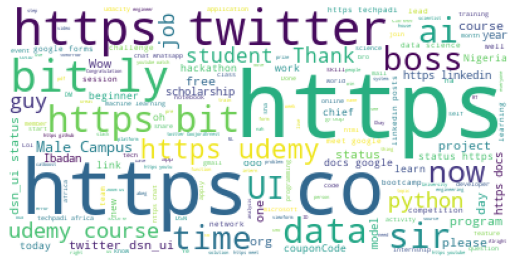

In [ ]:
unique_string=(" ").join(cloud_words)
cloud = WordCloud(background_color = "white", max_words = 200,  stopwords = set(STOPWORDS))
w=cloud.generate(unique_string)
plt.figure(figsize=(9,7)) 
plt.imshow(w)
plt.axis("off")

plt.savefig("wordcloud"+".png", bbox_inches='tight')
plt.show()
plt.close()

In [ ]:
from google.colab import files
files.download("wordcloud.png") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>